<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 2015-01-01 00:00:00+01:00 to 2018-12-31 23:00:00+01:00
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35045 non-null  float64
 1   generation fossil brown coal/lignite         35046 non-null  float64
 2   generation fossil gas                        35046 non-null  float64
 3   generation fossil hard coal                  35046 non-null  float64
 4   generation fossil oil                        35045 non-null  float64
 5   generation hydro pumped storage consumption  35045 non-null  float64
 6   generation hydro run-of-river and poundage   35045 non-null  float64
 7   generation hydro water reservoir             35046 non-null  float64
 8   generation nuclear                           35047 non-null  float64
 9   generation other                 

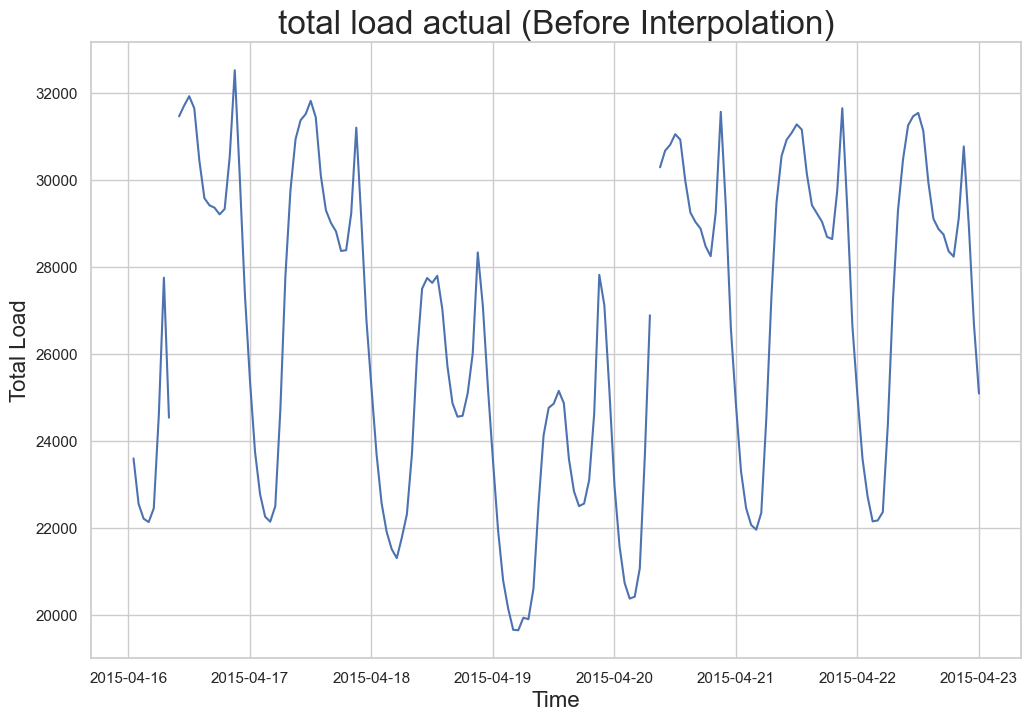

Non-zero values in each column:

generation biomass                             35060
generation fossil brown coal/lignite           24540
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22450
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
total load actual                              35064
price day ahead                                35064
price actual                                   35064
dtype: int64


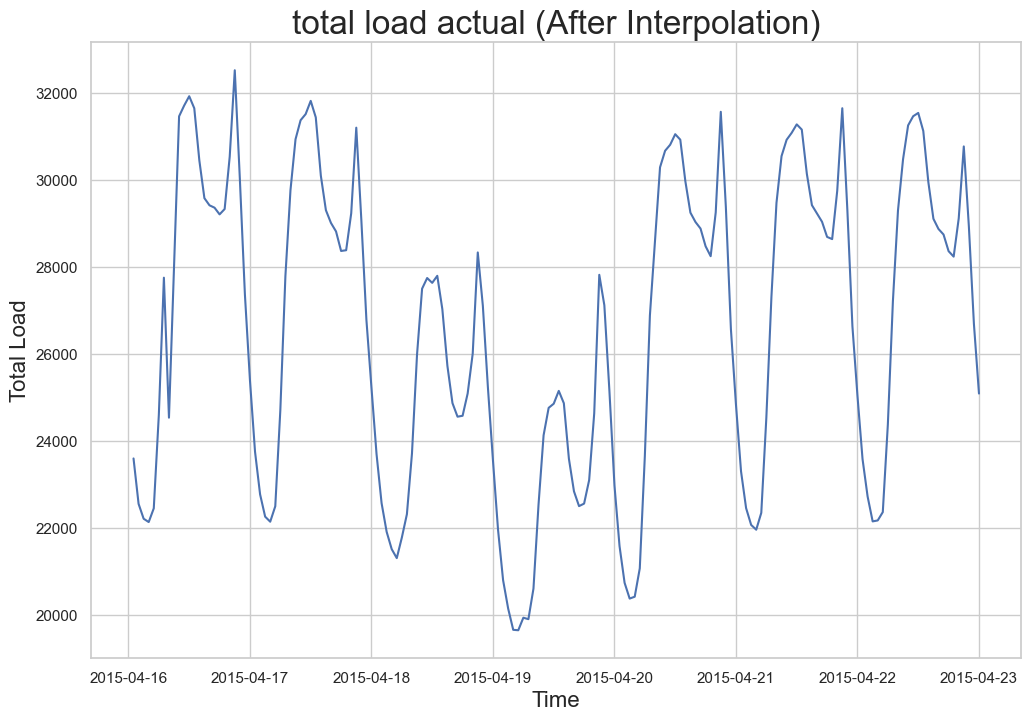

There are 35064 observations in df_energy.
There are 35145 observations in df_weather about city: Valencia.
There are 36267 observations in df_weather about city: Madrid.
There are 35951 observations in df_weather about city: Bilbao.
There are 35476 observations in df_weather about city:  Barcelona.
There are 35557 observations in df_weather about city: Seville.
There are 35064 observations in df_energy.
There are 35064 observations in df_weather about city: Valencia.
There are 35064 observations in df_weather about city: Madrid.
There are 35064 observations in df_weather about city: Bilbao.
There are 35064 observations in df_weather about city:  Barcelona.
There are 35064 observations in df_weather about city: Seville.
12
41
37
[200. 201. 202. 210. 211. 300. 301. 302. 310. 311. 500. 501. 502. 503.
 520. 521. 522. 531. 600. 601. 602. 611. 615. 616. 620. 701. 711. 721.
 731. 741. 761. 771. 800. 801. 802. 803. 804.]
ID: 501.0 ['moderate rain' 'proximity moderate rain']
ID: 521.0 ['shower

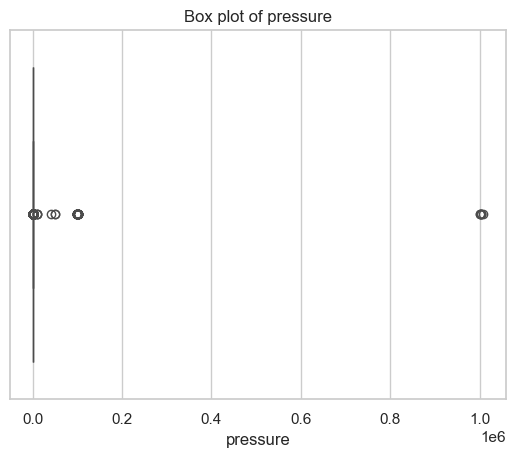

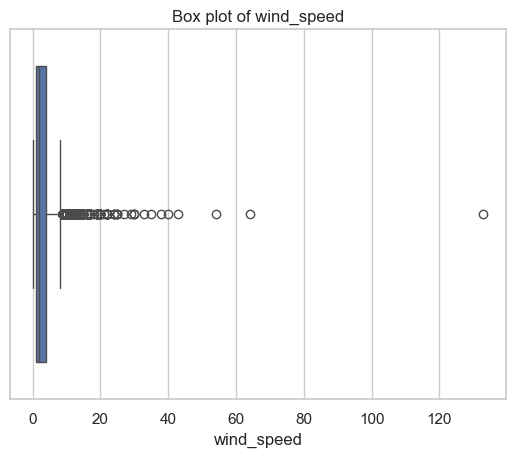

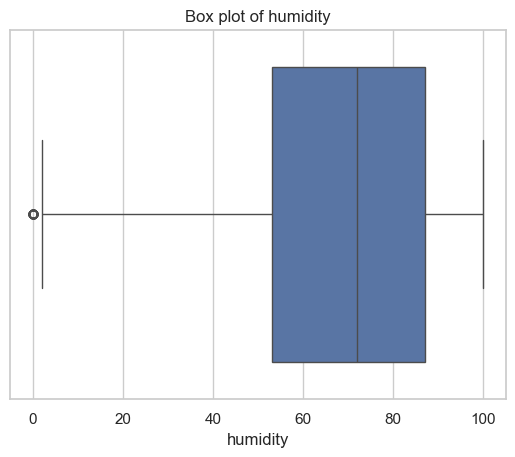

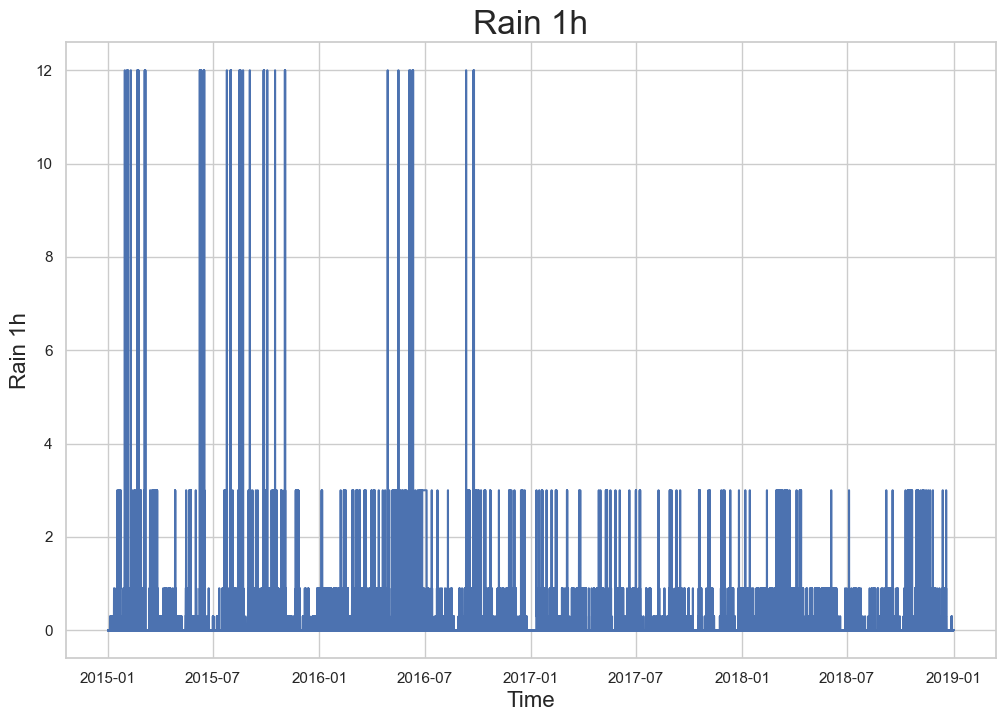

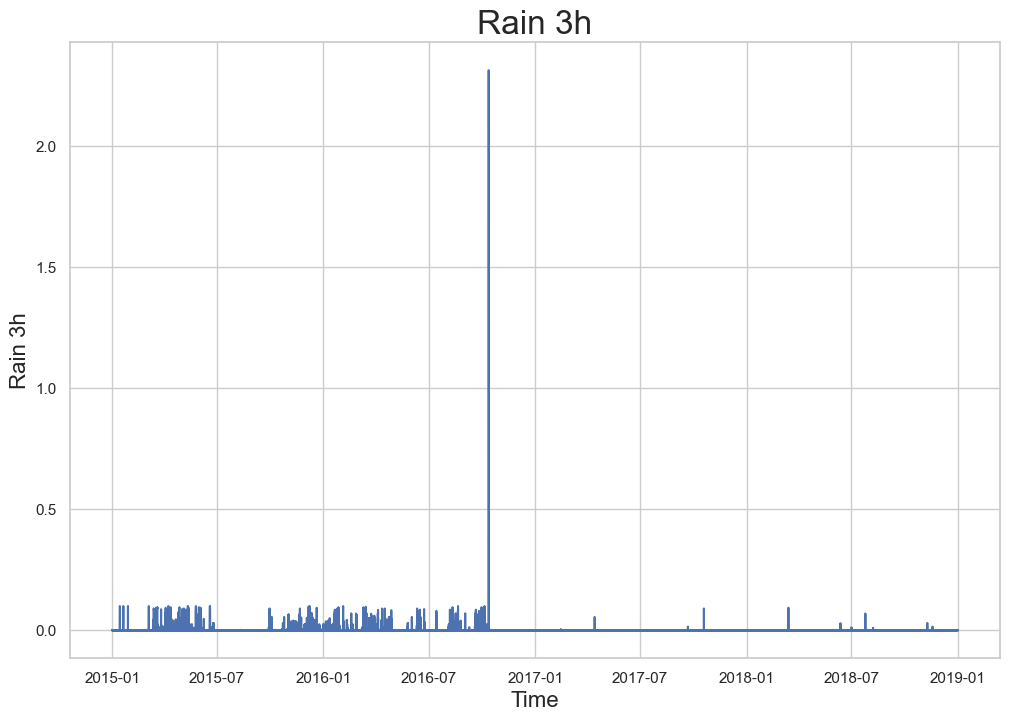

There are 0 missing values or NaNs in df_final.


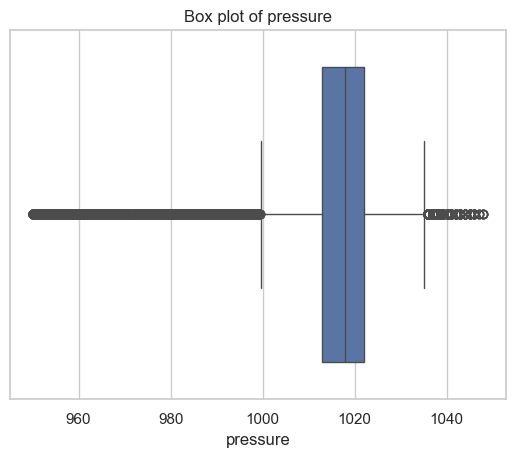

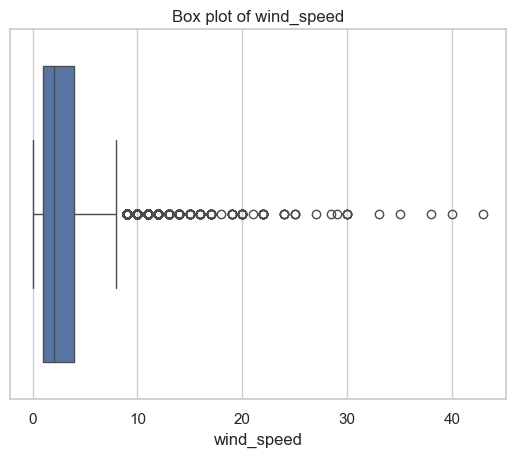

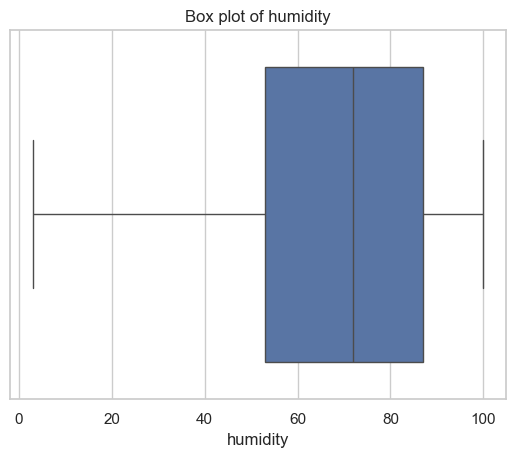

(35064, 72)
There are 0 missing values or NaNs in df_final.

There are 0 duplicate rows in df_energy based on all columns.


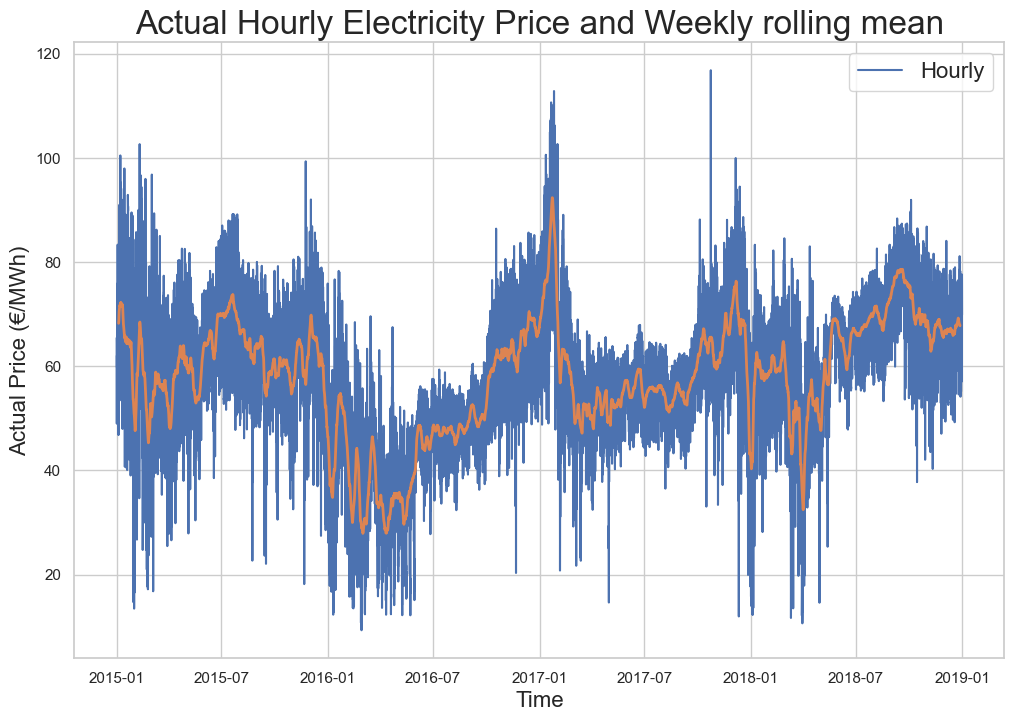

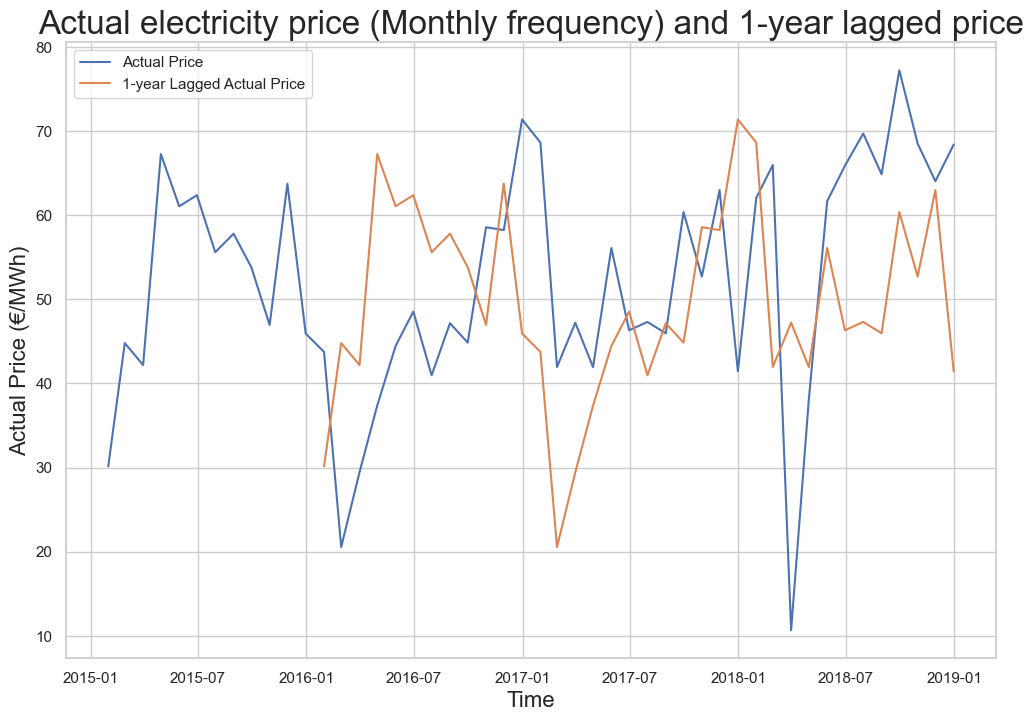

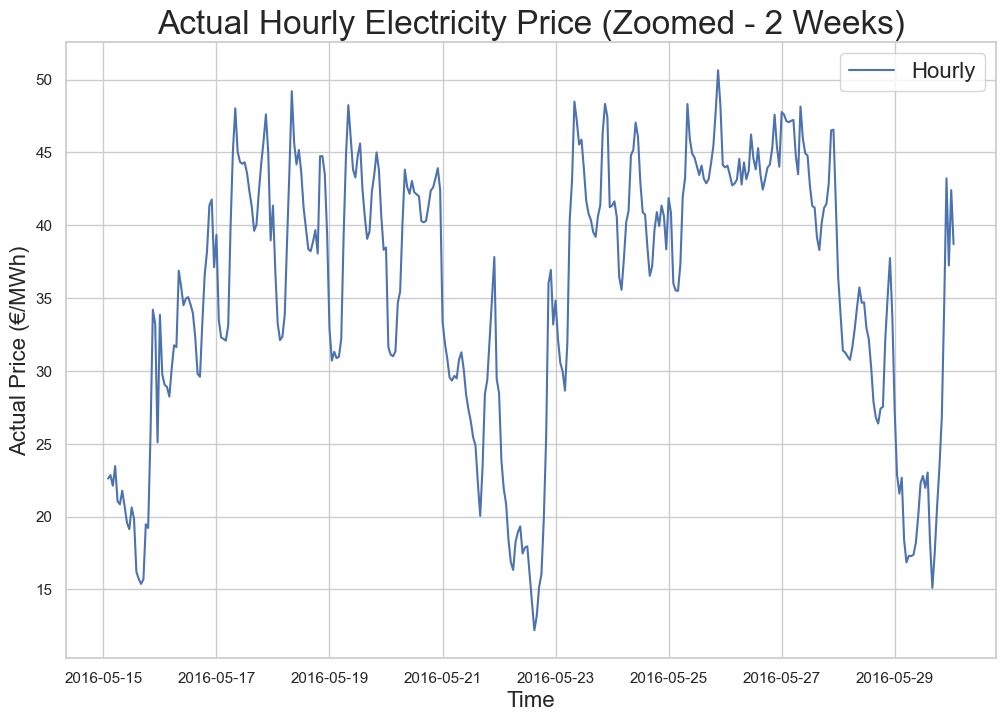

price actual                                   1.000000
price day ahead                                0.732155
generation fossil hard coal                    0.465637
generation fossil gas                          0.461452
total load actual                              0.435253
generation fossil brown coal/lignite           0.363993
generation fossil oil                          0.285050
generation other renewable                     0.255551
pressure_0                                     0.254772
pressure_1                                     0.194063
generation waste                               0.168710
generation biomass                             0.142671
temp_min_4                                     0.133141
pressure_4                                     0.109812
temp_min_0                                     0.103726
generation other                               0.099914
generation solar                               0.098529
temp_max_2                                     0

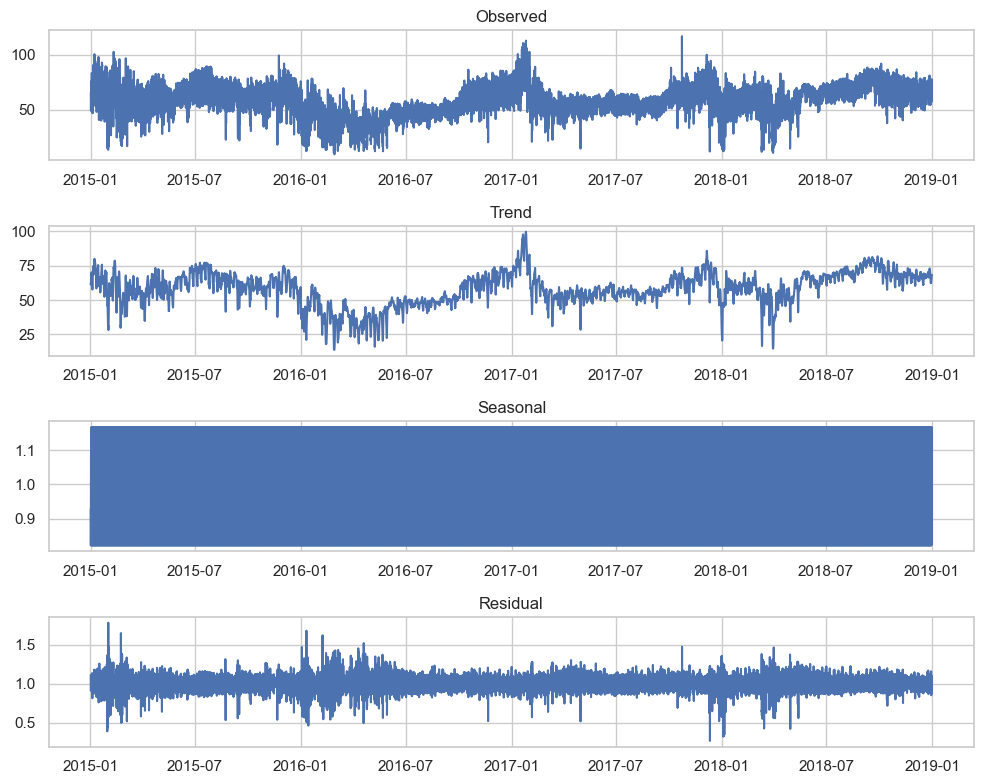

datetime64[ns, UTC]
Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_0', 'temp_min_0', 'temp_max_0',
       'pressure_0', 'humidity_0', 'wind_speed_0', 'wind_deg_0', 'rain_1h_0',
       'clouds_all_0', 'weather_id_0', 'temp_1', 'temp_min_1', 'temp_max_1',
       'pressure_1', 'humidity_1', 'wind_speed_1', 'wind_deg_1', 'rain_1h_1',
       'snow_3h_1', 'clouds_all_1', 'weather_id_1', 'temp_2', 'temp_min_2',
       'temp_max_2', 'pressure_2', 'humidity_2', 'wind_speed_2', 'wind_deg_2',
       'rain_1h_2', 'snow_3h_2'

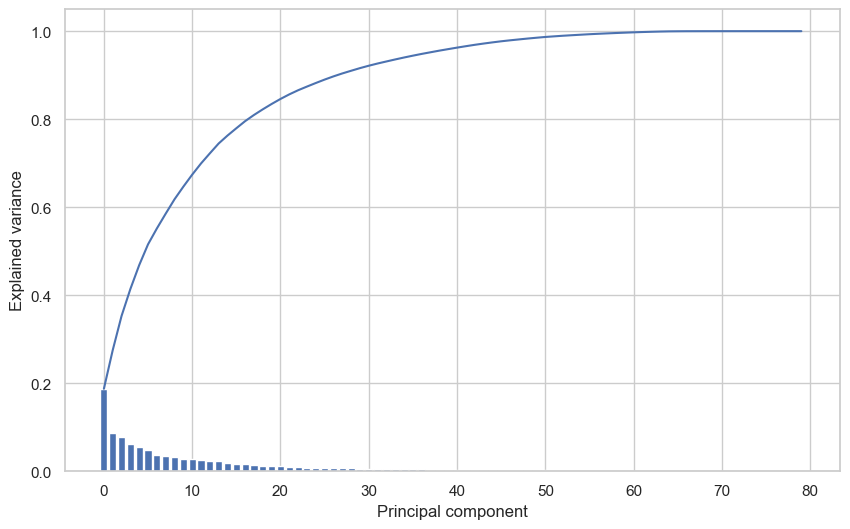

In [53]:
%run preprocessing.ipynb

%run featuregeneration.ipynb


In [54]:

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape to (samples, timesteps * features)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


### DecisionTreeRegressor

Decision Tree Validation MAE: 0.027356963105876212
Decision Tree Validation MSE: 0.0014065913425455867
Decision Tree Validation RMSE: 0.0375045509577916
Decision Tree Validation R^2: 0.88640578403807
Decision Tree Test MAE: 0.02594193108866416
Decision Tree Test MSE: 0.0011968372931402639
Decision Tree Test RMSE: 0.0345953362917643
Decision Tree Test R^2: 0.788728721358414


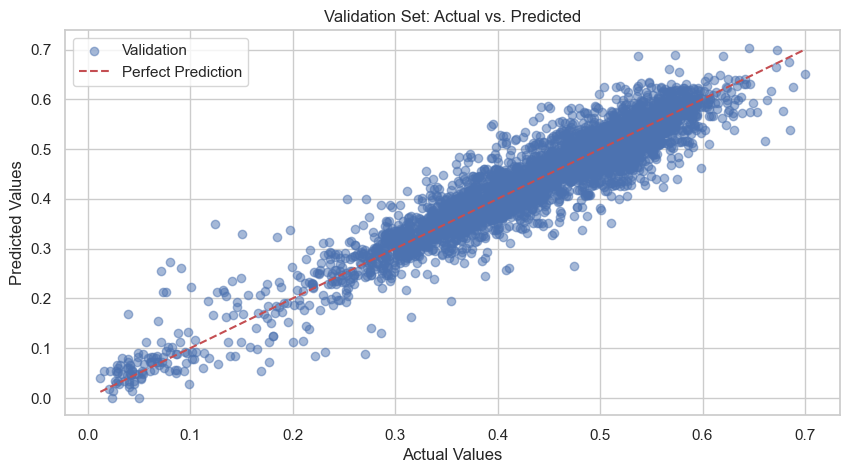

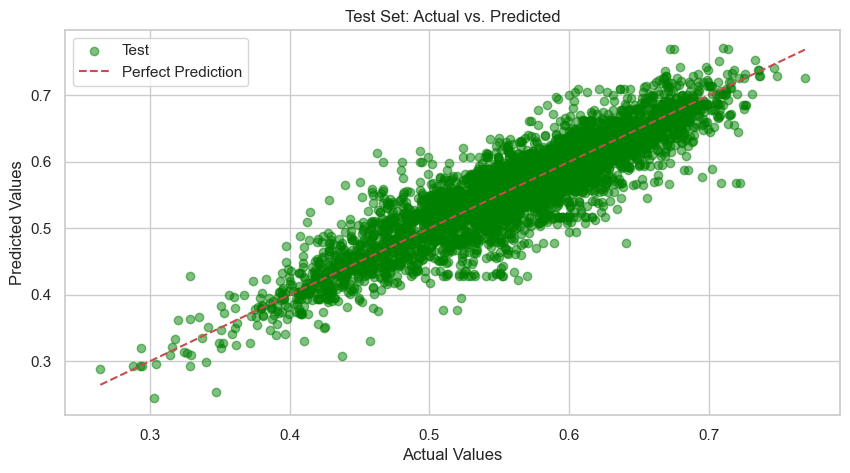

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_reshaped, y_train)

# Validation and Test Predictions
y_pred_val_dt = dt_model.predict(X_val_reshaped)
y_pred_test_dt = dt_model.predict(X_test_reshaped)

# Validation and Test Scores
print("Decision Tree Validation MAE:", mean_absolute_error(y_val, y_pred_val_dt))
print("Decision Tree Validation MSE:", mean_squared_error(y_val, y_pred_val_dt))
print("Decision Tree Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val_dt)))
print("Decision Tree Validation R^2:", r2_score(y_val, y_pred_val_dt))

# Test Scores
print("Decision Tree Test MAE:", mean_absolute_error(y_test, y_pred_test_dt))
print("Decision Tree Test MSE:", mean_squared_error(y_test, y_pred_test_dt))
print("Decision Tree Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_dt)))
print("Decision Tree Test R^2:", r2_score(y_test, y_pred_test_dt))

import matplotlib.pyplot as plt

# Plot for validation set
plt.figure(figsize=(10, 5))
plt.scatter(y_val, y_pred_val_dt, alpha=0.5, label="Validation")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Validation Set: Actual vs. Predicted")
plt.legend()
plt.show()

# Plot for test set
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test_dt, alpha=0.5, color="green", label="Test")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs. Predicted")
plt.legend()
plt.show()





### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # Reduced estimators for quicker runtime
rf_model.fit(X_train_reshaped, y_train)

# Validation and Test Predictions
y_pred_val_rf = rf_model.predict(X_val_reshaped)
y_pred_test_rf = rf_model.predict(X_test_reshaped)

# Validation Scores
print("Random Forest Validation MAE:", mean_absolute_error(y_val, y_pred_val_rf))
print("Random Forest Validation MSE:", mean_squared_error(y_val, y_pred_val_rf))
print("Random Forest Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val_rf)))
print("Random Forest Validation R^2:", r2_score(y_val, y_pred_val_rf))

# Test Scores
print("Random Forest Test MAE:", mean_absolute_error(y_test, y_pred_test_rf))
print("Random Forest Test MSE:", mean_squared_error(y_test, y_pred_test_rf))
print("Random Forest Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))
print("Random Forest Test R^2:", r2_score(y_test, y_pred_test_rf))

# Accuracy (R^2 Score on the test set)
print("Random Forest Test Accuracy (R^2):", rf_model.score(X_test_reshaped, y_test))


Random Forest Validation MAE: 0.018347465277601074
Random Forest Validation MSE: 0.0007061511218420709
Random Forest Validation RMSE: 0.026573504131786437
Random Forest Validation R^2: 0.9530684650610557
Random Forest Test MAE: 0.016366076838484827
Random Forest Test MSE: 0.00048780117346398433
Random Forest Test RMSE: 0.022086221348704815
Random Forest Test R^2: 0.9296246541715092
Random Forest Test Accuracy (R^2): 0.9296246541715092


### SVM with kernels

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the SVM model with scaling
svm_pipeline = Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='rbf'))])
svm_pipeline.fit(X_train_reshaped, y_train)

# Validation and Test Predictions
y_pred_val_svm = svm_pipeline.predict(X_val_reshaped)
y_pred_test_svm = svm_pipeline.predict(X_test_reshaped)

# Validation Scores
print("SVM Validation MAE:", mean_absolute_error(y_val, y_pred_val_svm))
print("SVM Validation MSE:", mean_squared_error(y_val, y_pred_val_svm))
print("SVM Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val_svm)))
print("SVM Validation R^2:", r2_score(y_val, y_pred_val_svm))

# Test Scores
print("SVM Test MAE:", mean_absolute_error(y_test, y_pred_test_svm))
print("SVM Test MSE:", mean_squared_error(y_test, y_pred_test_svm))
print("SVM Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_svm)))
print("SVM Test R^2:", r2_score(y_test, y_pred_test_svm))

# Accuracy (R^2 Score on the test set)
print("SVM Test Accuracy (R^2):", svm_pipeline.score(X_test_reshaped, y_test))


SVM Validation MAE: 0.04309431593243547
SVM Validation MSE: 0.0031855740106036118
SVM Validation RMSE: 0.05644088952704069
SVM Validation R^2: 0.7882834518633357
SVM Test MAE: 0.038968508311722015
SVM Test MSE: 0.0023463875664925726
SVM Test RMSE: 0.04843952483760108
SVM Test R^2: 0.6614853644836967
SVM Test Accuracy (R^2): 0.6614853644836967


### Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Define the neural network model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train, epochs=50, validation_data=validation, callbacks=[early_stopping])

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)
predictions_inv = scaler_y.inverse_transform(predictions)

Epoch 1/50


/Users/birkstrandbjornaa/Documents/DatatekH24/Datadrevet programvare/it3212-data-driven-software/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0230 - val_loss: 0.0076
Epoch 2/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0062 - val_loss: 0.0053
Epoch 3/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 4/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 5/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 6/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 8/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 9/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 11/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0012 - val_loss: 8.0769e-04
Epoch 12/50
767/767 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6067e-04
Test Loss (MSE): 0.0005092085339128971
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 1.7656108708083116
Mean Squared Error (MSE): 5.45266147109685
Root Mean Squared Error (RMSE): 2.3350934608912017
R^2 Score: 0.926536198724444


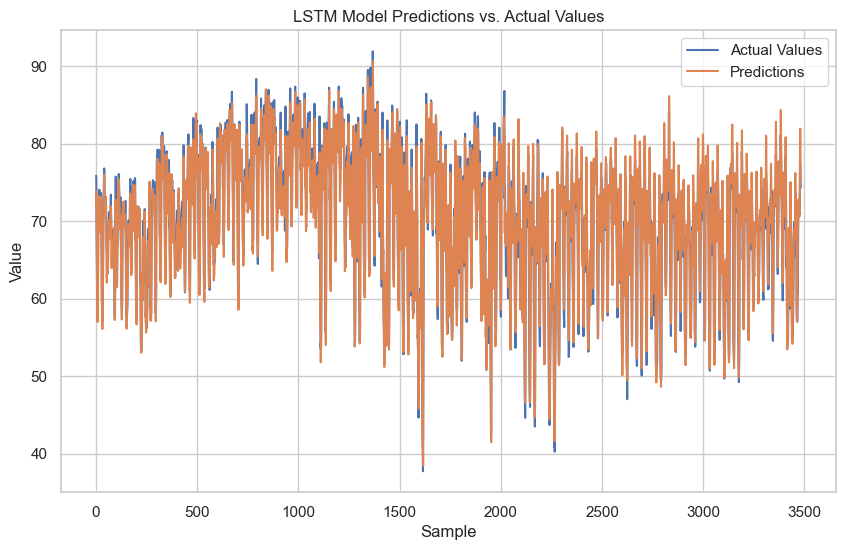

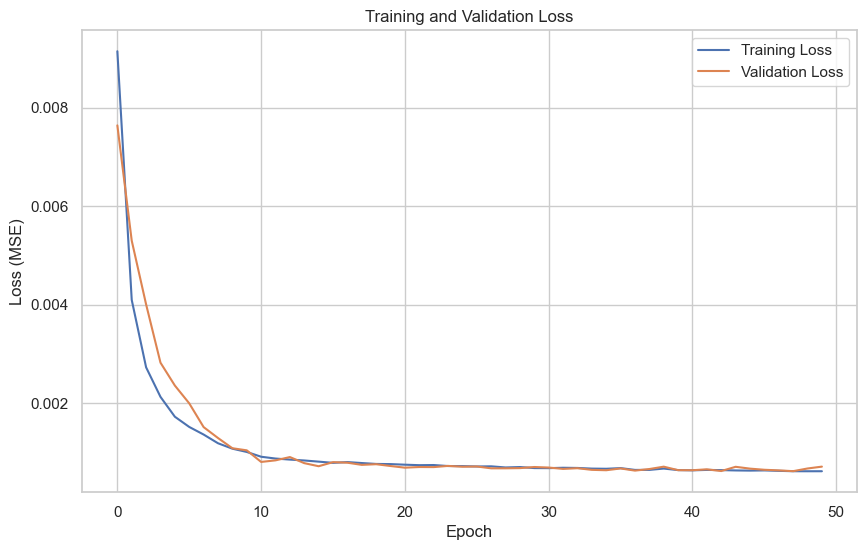

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

# Make predictions and inverse transform if necessary
predictions = model.predict(X_test)
predictions_inv = scaler_y.inverse_transform(predictions)
y_test_inv = scaler_y.inverse_transform(y_test)  # Inverse transform actual values

# Calculate performance metrics
mae = mean_absolute_error(y_test_inv, predictions_inv)
mse = mean_squared_error(y_test_inv, predictions_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, predictions_inv)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Values')
plt.plot(predictions_inv, label='Predictions')
plt.title('LSTM Model Predictions vs. Actual Values')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot training & validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


### Additive methods

21:56:28 - cmdstanpy - INFO - Chain [1] start processing
21:56:59 - cmdstanpy - INFO - Chain [1] done processing


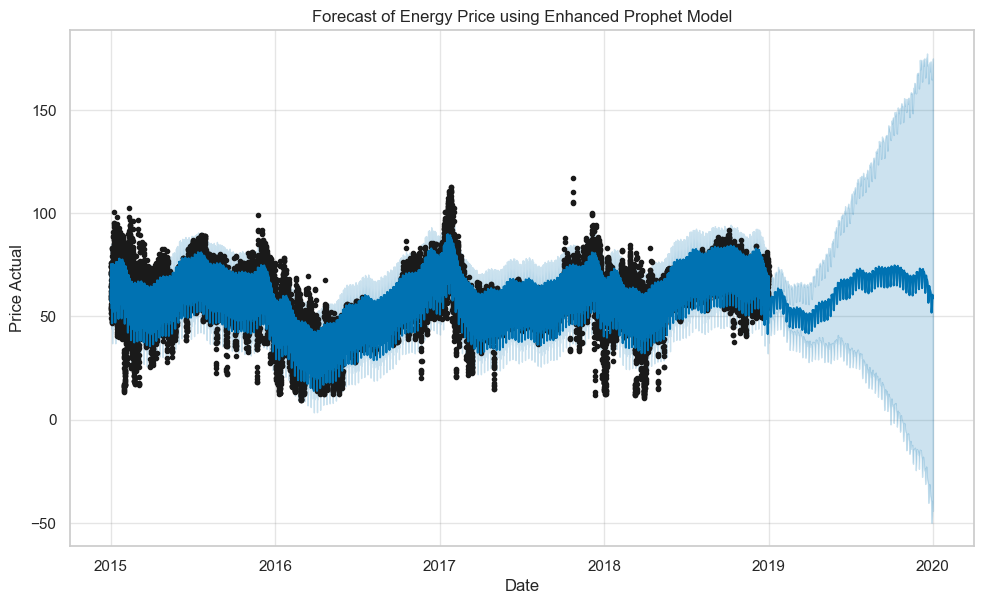

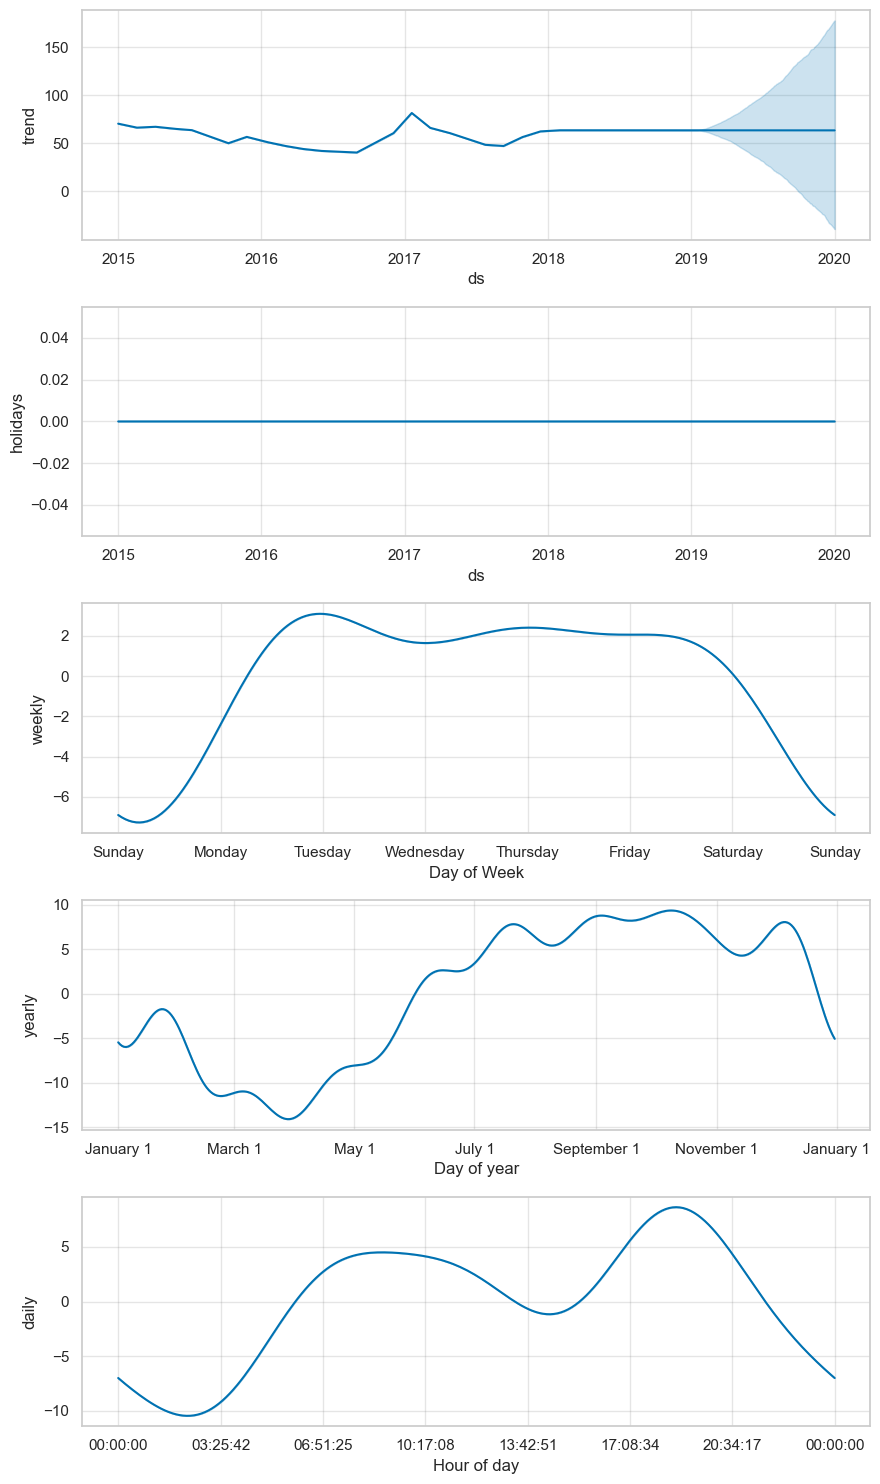

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


Mean Absolute Error (MAE): 5.650306446191584
Mean Squared Error (MSE): 58.072661167274376
Root Mean Squared Error (RMSE): 7.6205420520639064
R^2 Score: 0.7121556606585144


  0%|          | 0/5 [00:00<?, ?it/s]21:57:17 - cmdstanpy - INFO - Chain [1] start processing
21:57:19 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:05<00:23,  5.93s/it]21:57:24 - cmdstanpy - INFO - Chain [1] start processing
21:57:29 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:15<00:24,  8.12s/it]21:57:34 - cmdstanpy - INFO - Chain [1] start processing
21:57:43 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [00:30<00:22, 11.04s/it]21:57:49 - cmdstanpy - INFO - Chain [1] start processing
21:58:08 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [00:54<00:16, 16.43s/it]21:58:14 - cmdstanpy - INFO - Chain [1] start processing
21:58:28 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [01:15<00:00, 15.06s/it]


           horizon         mse       rmse        mae      mape     mdape  \
0 36 days 12:00:00  201.170379  14.183454  10.382062  0.216457  0.122633   
1 36 days 13:00:00  201.189532  14.184130  10.380752  0.216250  0.122452   
2 36 days 14:00:00  201.235125  14.185737  10.380763  0.216022  0.122176   
3 36 days 15:00:00  201.286690  14.187554  10.381237  0.215771  0.122045   
4 36 days 16:00:00  201.412240  14.191978  10.384689  0.215676  0.121949   

      smape  coverage  
0  0.251142  0.604338  
1  0.251107  0.604566  
2  0.251075  0.604795  
3  0.251044  0.605023  
4  0.251118  0.605251  


In [ ]:
from matplotlib import pyplot as plt
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming df_final has been preprocessed and loaded
# Reset the index to get 'time' as a column, and drop NaNs if necessary
df_prophet = df_final[['time', 'price actual']].rename(columns={'time': 'ds', 'price actual': 'y'})

# Remove timezone information from 'ds' column
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None)

# Initialize the Prophet model with custom parameters
model = Prophet(
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10.0,
    holidays=None  # Placeholder, we'll add holidays later
)

# Adding external regressors for temperature and demand
model.add_regressor('temperature')
model.add_regressor('demand')

# Define custom seasonalities (if needed)
model.add_seasonality(name='weekly', period=7, fourier_order=10)

# Define holidays (for the US as an example)
from prophet.make_holidays import make_holidays_df
holidays = make_holidays_df(year_list=[2022, 2023], country='US')
model = Prophet(holidays=holidays)

# Drop any rows with NaN values to avoid errors
df_prophet = df_prophet.dropna()

# Fit the model
model.fit(df_prophet)

# Make a future DataFrame for predictions
future = model.make_future_dataframe(periods=365, freq='D')
future['temperature'] = ... # Fill in future values or interpolate based on historical data
future['demand'] = ...      # Same as above

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title("Forecast of Energy Price using Enhanced Prophet Model")
plt.xlabel("Date")
plt.ylabel("Price Actual")
plt.show()

# Plot the trend, seasonality, and other components
fig2 = model.plot_components(forecast)
plt.show()

# Calculate performance metrics on historical data
forecast_history = forecast[forecast['ds'].isin(df_prophet['ds'])]
y_pred = forecast_history['yhat'].values
y_true = df_prophet['y'].values

# Calculate performance metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Perform cross-validation for further performance evaluation
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())
